# project 3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
titanic_data = pd.read_csv('titanic_data1')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
titanic_data.shape

(891, 12)

In [11]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
titanic_data = titanic_data.drop(['PassengerId','Name'],axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [15]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [16]:
#checking null values

titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

observation :
1. age, cabin and embarked has null values
2. embarked has highest number of null values which will not help in making a good model so dropping it would be more effective

In [18]:
titanic_data = titanic_data.drop(['Cabin'],axis=1)
titanic_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [19]:
#checking information 

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [20]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#summary stats

1. if mean is greater than median , it is  right skewed data.
2. there is large difference in 75% th percentile  and max in age, sibsip,parch, fare
which means outliars are present due to data spread.

In [21]:
#checking unique elements in each of the columns

titanic_data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

# target class is survived as stated in problem statement

analysis of target class

In [23]:
titanic_data['Survived'].unique()

array([0, 1], dtype=int64)

In [24]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

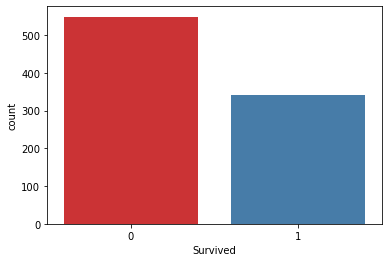

In [26]:
sns.countplot(titanic_data['Survived'],palette="Set1")


In [27]:
#Analyzing Feature column Catergorical Classes
titanic_data['Sex'].unique() 

array(['male', 'female'], dtype=object)

In [28]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

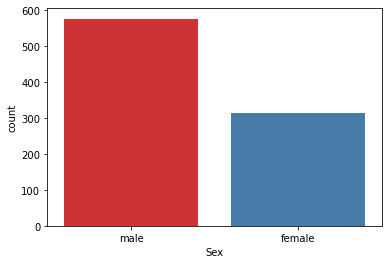

In [29]:
sns.countplot(titanic_data['Sex'],palette ="Set1")

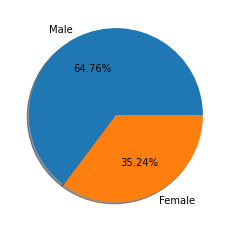

In [30]:
labels = 'Male','Female'
fig, ax = plt.subplots()
ax.pie(titanic_data['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

male comprisses of 64.76% and female comprises od 35.24%

In [31]:
titanic_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [32]:
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

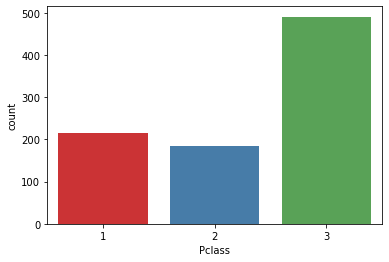

In [33]:
sns.countplot(titanic_data['Pclass'], palette="Set1")

majority of the class belongs to pclass = 3 with 491 passengers

In [34]:
titanic_data['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
titanic_data['Embarked'].isnull().sum()

2

there are only 2 null values so we can drop the rows with null values as that wont effect the training dataset

In [38]:
#finding the indices
titanic_data.loc[pd.isna(titanic_data["Embarked"]),:].index

Int64Index([61, 829], dtype='int64')

In [39]:
titanic_data.drop([61,829],inplace=True)

In [40]:
titanic_data.shape

(889, 9)

In [41]:
titanic_data.reset_index(drop=True,inplace=True)

In [42]:
titanic_data['Embarked'].isnull().sum()

0

null values of embarked are removed

In [43]:
titanic_data['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

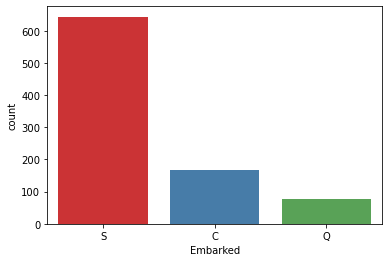

In [44]:
sns.countplot(titanic_data['Embarked'], palette="Set1")

highest number of passengers embarked from 'S'

# encoding as machine understand only binary language

sex and embarked are being encoded

In [55]:
titanic_data['Sex'] = titanic_data.Sex.map({'female':0,'male':1})

In [57]:
dum = pd.get_dummies(titanic_data['Embarked'],drop_first=False)


In [58]:
dum

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [59]:
titanic_data = titanic_data.join(dum)

In [60]:
titanic_data.drop(columns=['Embarked'],axis=1,inplace=True)

In [61]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,1,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,211536,13.0000,0,0,1
885,1,1,0,19.0,0,0,112053,30.0000,0,0,1
886,0,3,0,NaN,1,2,W./C. 6607,23.4500,0,0,1
887,1,1,1,26.0,0,0,111369,30.0000,1,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

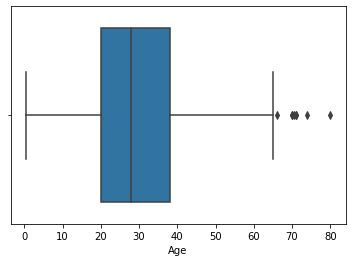

In [62]:
#fillin gnan valuesin age columns
sns.boxplot(titanic_data['Age'])

since outliars are present mean will not be used to fill nan values as it will be effected by outliars

In [63]:
#using KNN Imputation techniquwe for imputing missing data

from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
titanic_new = titanic_data.copy()

In [64]:
titanic_new = imp.fit_transform(titanic_new[['Sex','Age']])

In [65]:
titanic_new

array([[ 1., 22.],
       [ 0., 38.],
       [ 0., 26.],
       ...,
       [ 0., 32.],
       [ 1., 26.],
       [ 1., 32.]])

In [66]:
titanic_new = pd.DataFrame(titanic_new,columns=['Age','Sex'])

In [67]:
titanic_new.index = titanic_data.index

In [68]:
titanic_data[['Age','Sex']]= titanic_new[['Age','Sex']]

In [69]:
titanic_data['Age'].isnull().sum()

0

In [70]:
#finding corr
corr = titanic_data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
Survived,1.000000,-0.335549,-0.061387,-0.541585,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.327795,0.127741,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466
Sex,-0.061387,-0.327795,1.000000,0.065452,-0.225819,-0.173839,0.091212,0.034131,-0.004313,-0.027190
Age,-0.541585,0.127741,0.065452,1.000000,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405
SibSp,-0.034040,0.081656,-0.225819,-0.116348,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.173839,-0.247508,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.091212,-0.179958,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758
C,0.169966,-0.245733,0.034131,-0.084520,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613
Q,0.004536,0.220558,-0.004313,-0.075217,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261
S,-0.151777,0.076466,-0.027190,0.121405,0.069438,0.061512,-0.163758,-0.782613,-0.499261,1.000000


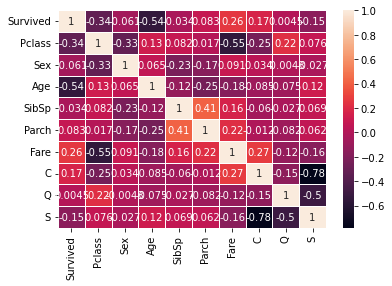

In [71]:
plt.figure
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column

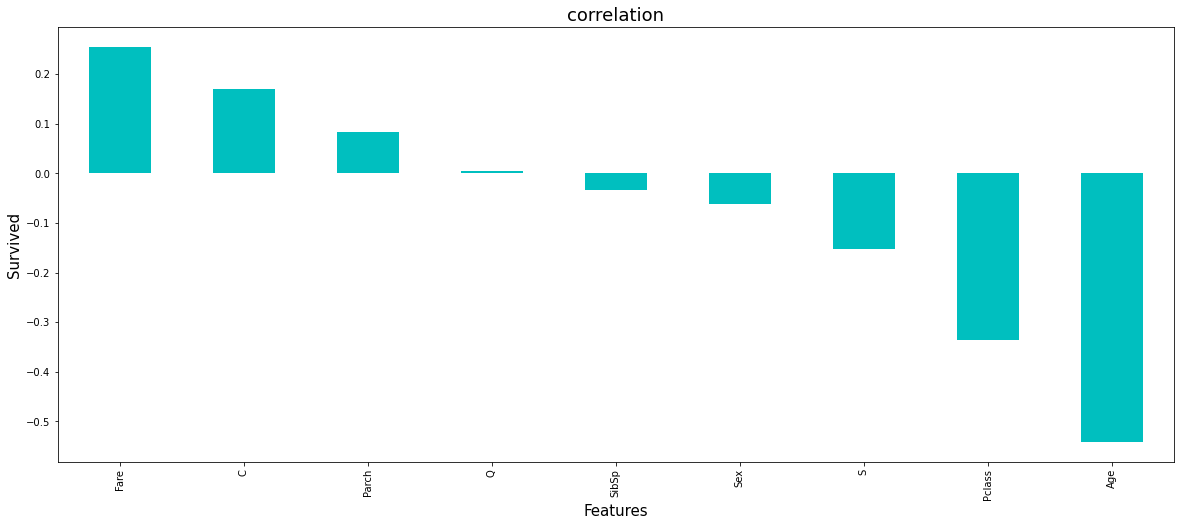

In [72]:
plt.figure(figsize = (20,8))
titanic_data.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Pclass also has a high negative correlation with 'Survived' indicating that Pclass 1 passengers were given top priority during rescue and evacuation.

Fare also has a considerable correlation with 'Survived' indicating that those who paid premium prices were given higher priority during rescue and evacuation.

 Women had higher chance of survival than men. Passengers who embarked from 'C' had higher chance of Survival than those who had embarked from 'Q' and 'S'

In [77]:
X = titanic_data.drop(columns = ['Survived'])
y = titanic_data['Survived']

In [73]:
titanic_data['Families']=titanic_data['Parch']+titanic_data['SibSp']

In [74]:
titanic_data['Families']

0      1
1      1
2      0
3      1
4      0
      ..
884    0
885    0
886    3
887    0
888    0
Name: Families, Length: 889, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

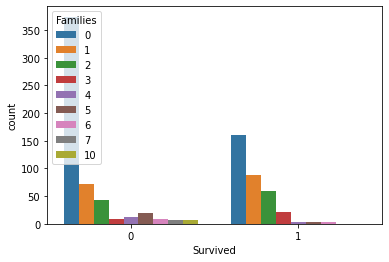

In [78]:
sns.countplot(y, hue =titanic_data['Families'])

In [79]:
#Dropping columns 'SibSp' and 'Parch'
titanic_data.drop(columns=['SibSp','Parch'],inplace=True )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

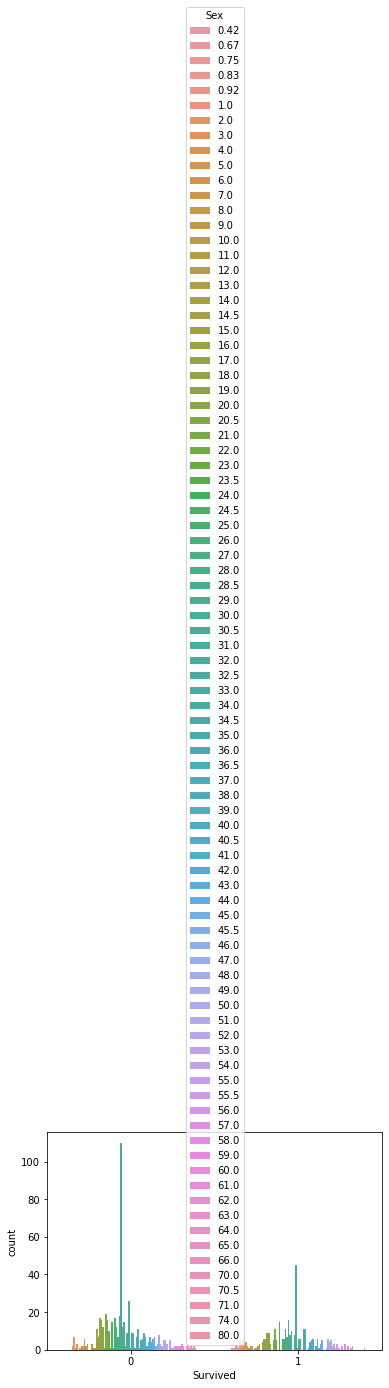

In [81]:
sns.countplot(y, hue = titanic_data['Sex'])

# women were more likely to have survived than men

In [83]:
titanic_data

,Survived,Pclass,Sex,Age,Ticket,Fare,C,Q,S,Families
0,0,3,22.0,1.0,A/5 21171,7.2500,0,0,1,1
1,1,1,38.0,0.0,PC 17599,71.2833,1,0,0,1
2,1,3,26.0,0.0,STON/O2. 3101282,7.9250,0,0,1,0
3,1,1,35.0,0.0,113803,53.1000,0,0,1,1
4,0,3,35.0,1.0,373450,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.0,1.0,211536,13.0000,0,0,1,0
885,1,1,19.0,0.0,112053,30.0000,0,0,1,0
886,0,3,32.0,0.0,W./C. 6607,23.4500,0,0,1,3
887,1,1,26.0,1.0,111369,30.0000,1,0,0,0


handling outliars

In [84]:
X = titanic_data.drop(columns = ['Survived'])
y = titanic_data['Survived']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

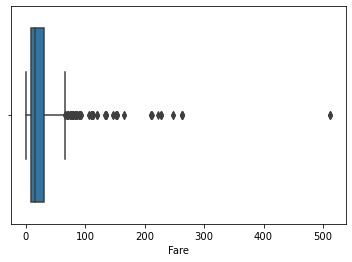

In [86]:
sns.boxplot(titanic_data['Fare'])

# removing outliars using z score method

In [88]:
titanic_data.shape

(889, 10)

In [91]:
from scipy.stats import zscore
import numpy as np

In [94]:
titanic_data

,Survived,Pclass,Sex,Age,Ticket,Fare,C,Q,S,Families
0,0,3,22.0,1.0,A/5 21171,7.2500,0,0,1,1
1,1,1,38.0,0.0,PC 17599,71.2833,1,0,0,1
2,1,3,26.0,0.0,STON/O2. 3101282,7.9250,0,0,1,0
3,1,1,35.0,0.0,113803,53.1000,0,0,1,1
4,0,3,35.0,1.0,373450,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
884,0,2,27.0,1.0,211536,13.0000,0,0,1,0
885,1,1,19.0,0.0,112053,30.0000,0,0,1,0
886,0,3,32.0,0.0,W./C. 6607,23.4500,0,0,1,3
887,1,1,26.0,1.0,111369,30.0000,1,0,0,0


In [95]:
titanic_data.drop(columns=['Ticket'],inplace=True)

In [96]:
titanic_data

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,22.0,1.0,7.2500,0,0,1,1
1,1,1,38.0,0.0,71.2833,1,0,0,1
2,1,3,26.0,0.0,7.9250,0,0,1,0
3,1,1,35.0,0.0,53.1000,0,0,1,1
4,0,3,35.0,1.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
884,0,2,27.0,1.0,13.0000,0,0,1,0
885,1,1,19.0,0.0,30.0000,0,0,1,0
886,0,3,32.0,0.0,23.4500,0,0,1,3
887,1,1,26.0,1.0,30.0000,1,0,0,0


In [98]:
titanic_data.shape

(889, 9)

In [99]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(titanic_data))
threshold=3
np.where(z>3)

(array([  5,  13,  16,  22,  25,  27,  28,  32,  44,  46,  47,  59,  67,
         70,  81,  87,  95, 108, 115, 115, 117, 118, 125, 142, 155, 158,
        170, 179, 181, 185, 187, 195, 197, 200, 207, 213, 232, 240, 244,
        257, 259, 260, 263, 273, 277, 279, 288, 298, 299, 300, 302, 310,
        321, 323, 329, 340, 357, 358, 363, 367, 376, 379, 385, 387, 410,
        411, 420, 427, 437, 458, 467, 479, 492, 500, 501, 509, 516, 524,
        526, 540, 541, 551, 556, 559, 572, 592, 609, 611, 612, 625, 628,
        629, 652, 653, 656, 671, 677, 678, 679, 682, 688, 696, 699, 702,
        715, 717, 726, 729, 736, 741, 744, 748, 766, 767, 775, 777, 778,
        786, 789, 791, 812, 824, 827, 844, 848, 849, 861, 883, 888],
       dtype=int64),
 array([6, 8, 6, 6, 8, 4, 6, 6, 6, 6, 6, 8, 8, 8, 6, 4, 2, 6, 2, 6, 4, 8,
        6, 6, 6, 8, 6, 8, 8, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 4, 6, 8, 6, 6,
        6, 6, 6, 4, 6, 6, 6, 4, 6, 8, 6, 4, 6, 6, 6, 6, 4, 4, 8, 6, 6, 6,
        6, 6, 4, 6, 6, 8, 2, 6,

In [100]:
Titanic_data = titanic_data[(z<3).all(axis=1)]
Titanic_data

,Survived,Pclass,Sex,Age,Fare,C,Q,S,Families
0,0,3,22.0,1.0,7.2500,0,0,1,1
1,1,1,38.0,0.0,71.2833,1,0,0,1
2,1,3,26.0,0.0,7.9250,0,0,1,0
3,1,1,35.0,0.0,53.1000,0,0,1,1
4,0,3,35.0,1.0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
882,0,3,25.0,1.0,7.0500,0,0,1,0
884,0,2,27.0,1.0,13.0000,0,0,1,0
885,1,1,19.0,0.0,30.0000,0,0,1,0
886,0,3,32.0,0.0,23.4500,0,0,1,3


In [101]:
titanic_data.shape

(889, 9)

In [102]:
Titanic_data.shape

(761, 9)

In [103]:
loss = (889-761)/889*100

In [104]:
loss

14.39820022497188

lossing 14.398 is outside acceptable range

using z score method to reduce outliars

In [105]:
dropindx = X.index.difference(Titanic_data.index)

In [106]:
dropindx

Int64Index([  5,  13,  16,  22,  25,  27,  28,  32,  44,  46,
            ...
            791, 812, 824, 827, 844, 848, 849, 861, 883, 888],
           dtype='int64', length=128)

In [108]:
#dropping the outliers from original features Dataframe
titanic_data.drop(dropindx,inplace = True)

In [109]:
X = titanic_data.drop(columns = ['Survived'])
y = titanic_data['Survived']

In [110]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

# Normalizing Data Distribution

In [114]:
X[feat].skew()

Age    -0.725329
Fare    2.246685
dtype: float64

In [115]:
(X[feat]==0).sum()

Age     251
Fare     15
dtype: int64

In [116]:
# Using KNN Imputation technique for imputing missing data.
imp = KNNImputer(n_neighbors=2)

In [117]:
X_filled = X.copy()

In [118]:
X_filled = imp.fit_transform(X_filled[['Pclass','Fare']])

In [119]:
X_filled

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 1.    , 30.    ],
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ]])

In [120]:
X_filled = pd.DataFrame(X_filled, columns=['Pclass','Fare'])

In [121]:
X_filled.index = X.index

In [122]:
X[['Pclass','Fare']] = X_filled[['Pclass','Fare']]

In [123]:
X['Fare'].isnull().sum()

0

No values missing from 'Fare' column

In [124]:
X.skew()

Pclass     -0.538283
Sex         0.268034
Age        -0.725329
Fare        2.246685
C           1.484571
Q           0.000000
S          -1.484571
Families    1.820190
dtype: float64

# Reducing skewness further using PowerTransformer

In [125]:
from sklearn.preprocessing import PowerTransformer

In [126]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['Fare','Families']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns)
transformed.skew()

Fare       -0.003822
Families    0.542236
dtype: float64

In [127]:
transformed.index = X.index
X[['Fare','Families']] = transformed[['Fare','Families']]
X.skew()

Pclass     -0.538283
Sex         0.268034
Age        -0.725329
Fare       -0.003822
C           1.484571
Q           0.000000
S          -1.484571
Families    0.542236
dtype: float64

In [128]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
C           0
Q           0
S           0
Families    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

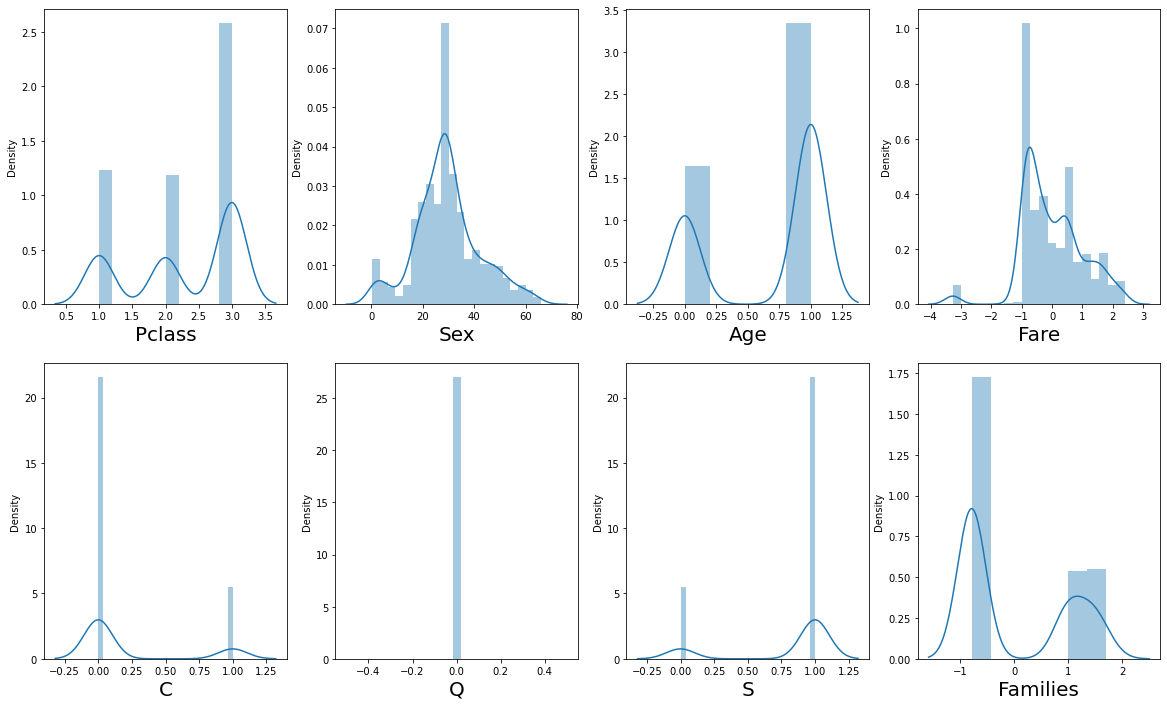

In [129]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Feature Selection

In [131]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 


array([[ 0.87898575, -0.60387338,  0.70153892, ...,  0.        ,
         0.50369312,  0.99242556],
       [-1.52715869,  0.66687433, -1.42543766, ...,  0.        ,
        -1.98533585,  0.99242556],
       [ 0.87898575, -0.28618645, -1.42543766, ...,  0.        ,
         0.50369312, -0.78533176],
       ...,
       [-1.52715869, -0.84213858, -1.42543766, ...,  0.        ,
         0.50369312, -0.78533176],
       [ 0.87898575,  0.19034394, -1.42543766, ...,  0.        ,
         0.50369312,  1.56865227],
       [-1.52715869, -0.28618645,  0.70153892, ...,  0.        ,
        -1.98533585, -0.78533176]])

# Checking for Multicollinearity using Variance Inflation Factor

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,vif
0,Pclass,2.111999
1,Sex,1.194352
2,Age,1.174944
3,Fare,2.517498
4,C,inf
5,Q,NaN
6,S,inf
7,Families,1.528456


# Selecting Kbest Features

In [134]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat = SelectKBest(score_func = f_classif, k = 8)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

    Feature       Score
2       Age  304.337698
3      Fare  126.574092
0    Pclass  107.764100
7  Families   48.982518
6         S   22.317665
4         C   22.317665
1       Sex    3.923148
5         Q         NaN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Buidling classification model

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
#Finding the best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, random_state = i,stratify = y)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8601694915254238 on random_state: 80


In [137]:
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,test_size = .31, stratify = y,random_state = 16) #sinc


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [140]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

In [141]:
#Training the Models
DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

# Decision Tree Classifier Model Accuracy

In [142]:
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
conf_matrx

array([[127,  19],
       [ 25,  65]], dtype=int64)

In [143]:
print(accu)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       146
           1       0.77      0.72      0.75        90

    accuracy                           0.81       236
   macro avg       0.80      0.80      0.80       236
weighted avg       0.81      0.81      0.81       236



# Logistic Regression Model Accuracy

In [144]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[127,  19],
       [ 29,  61]], dtype=int64)

In [145]:
print(accu)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.76      0.68      0.72        90

    accuracy                           0.80       236
   macro avg       0.79      0.77      0.78       236
weighted avg       0.79      0.80      0.79       236



# Random Forest Classifier Model Accuracy


In [146]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[130,  16],
       [ 26,  64]], dtype=int64)

In [147]:
print(accu)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       146
           1       0.80      0.71      0.75        90

    accuracy                           0.82       236
   macro avg       0.82      0.80      0.81       236
weighted avg       0.82      0.82      0.82       236



# SV Classifier Model Accuracy

In [148]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[141,   5],
       [ 41,  49]], dtype=int64)

In [149]:
print(accu)

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       146
           1       0.91      0.54      0.68        90

    accuracy                           0.81       236
   macro avg       0.84      0.76      0.77       236
weighted avg       0.83      0.81      0.79       236



# K Nearest Neighbours Classifier Model Accuracy

In [150]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[134,  12],
       [ 39,  51]], dtype=int64)

In [151]:
print(accu)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       146
           1       0.81      0.57      0.67        90

    accuracy                           0.78       236
   macro avg       0.79      0.74      0.75       236
weighted avg       0.79      0.78      0.77       236



# Model Cross Validation

In [152]:
from sklearn.model_selection import cross_val_score as cvs

In [153]:
# Decision Tree Classifier
print(cvs(DTC,scaled_X,y,cv=5).mean())  

0.7805899552803578


In [154]:
#Logistic Regression
print(cvs(LOGR,scaled_X,y,cv=5).mean()) 

0.7858359133126935


In [155]:
#Random Forest Classifier
print(cvs(RFC,scaled_X,y,cv=5).mean())

0.8016511867905057


In [156]:
#SV Classifier
print(cvs(SV,scaled_X,y,cv=5).mean())

0.8108187134502923


In [157]:
#K Nearest Neighbours Classifier
print(cvs(KNN,scaled_X,y,cv=5).mean())

0.8121947024423803


# ROC AUC Scores

In [158]:
#Decision Tree Classifier
roc_auc_score(y_test,DTCpred)

0.7960426179604263

In [159]:
#Logistic Regression
roc_auc_score(y_test,LOGRpred)

0.773820395738204

In [160]:
#Random Forest Classifier
roc_auc_score(y_test,RFCpred)

0.8007610350076104

In [161]:
#SV Classifier
roc_auc_score(y_test,SVpred)

0.7550989345509893

In [162]:
#K Nearest Neighbours Classifier
roc_auc_score(y_test,KNNpred)

0.7422374429223744

# Random Forest Classifier is the best model for the dataset

# ROC AUC curves

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be remov

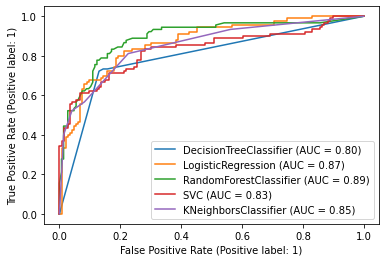

In [163]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,SV,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

# Hyper Parameter Tuning

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
#Random Forest Classifier
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [168]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 60}

In [169]:
Best_mod1 = RandomForestClassifier(n_estimators = 60,criterion = 'gini', max_depth= 10, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 2)
Best_mod1.fit(x_train,y_train)
rfpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

79.66101694915254


In [170]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[137,   9],
       [ 39,  51]], dtype=int64)

In [171]:
cr = classification_report(y_test,rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       146
           1       0.85      0.57      0.68        90

    accuracy                           0.80       236
   macro avg       0.81      0.75      0.77       236
weighted avg       0.81      0.80      0.79       236



In [172]:
import joblib
joblib.dump(Best_mod1,"BestModelTitanic.pkl")

['BestModelTitanic.pkl']

# Loading The Model

In [173]:
mod=joblib.load("BestModelTitanic.pkl")

In [174]:
print(mod.predict(x_test))

[1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 1 0 0 0 1 0 0 0]
